# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)# YOUR CODE HERE

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the book review dataset
2. I'll predict the likelyhood of a positive rating based on the written review. The label is true for positive and false for negative.
3. Its supervised learning because the data is labeled already. Its a binary classification problem.
4. Features are review text and review length
5. It can help companies understand their users preferences better which helps make better reccomendation systems for targetted promotions of other books theyre likely to enjoy.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
 2   review_length    1973 non-null   int64 
 3   label            1973 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 48.3+ KB
None

 First 5 Rows


,Review,Positive Review,review_length,label
0,This was perhaps the best of Johannes Steinhof...,True,86,1
1,This very fascinating book is a story written ...,True,249,1
2,The four tales in this collection are beautifu...,True,73,1
3,The book contained more profanity than I expec...,False,32,0
4,We have now entered a second time of deep conc...,True,371,1



 Data Types 
Review             object
Positive Review      bool
review_length       int64
label               int64
dtype: object

=== Review Length Summary ===
count    1973.000000
mean      160.943234
std       236.136329
min        11.000000
25%        59.000000
50%       103.000000
75%       183.000000
max      5167.000000
Name: review_length, dtype: float64

 Positive v. Negative Distribution
0    993
1    980
Name: label, dtype: int64


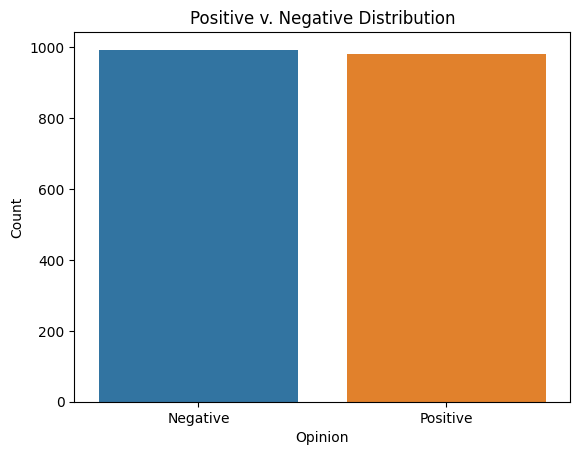

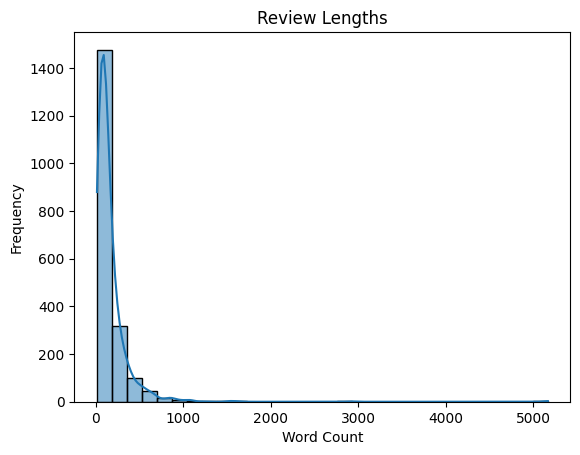

In [5]:
# YOUR CODE HERE

print("Dataset")
print(df.info())

print("\n First 5 Rows")
display(df.head())

print("\n Data Types ")
print(df.dtypes)

df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))
print("\n=== Review Length Summary ===")
print(df['review_length'].describe())

df['label'] = df['Positive Review'].astype(int)

print("\n Positive v. Negative Distribution")
print(df['label'].value_counts())

sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Positive v. Negative Distribution')
plt.xlabel('Opinion')
plt.ylabel('Count')
plt.show()

sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Review Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. The features I'll be keeping are review text, review length, and I'll be adding username and user city. I'll be getting rid of the positive boolean feature and switching it to just sentiment label.
2. To prepare the data I'll convert positive and negative to numerical values, then handle missing values, then go through each review and save the length, vectorize the review text, convert features like username and city into numbers, then finally split into training and test
3. Logistic regression
4. First, I will train a baseline Logistic Regression model using only the TF-IDF vectorized review text as input.I will evaluate the model using metrics like accuracy, precision, and recall to see how it trains on positive and negative reviews. I will then see if performance improves after adding more features like city and username, To improve I will use gridsearch with cross-validation to get the best model that generalizes well to new data.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import scipy
from scipy.sparse import hstack

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [12]:
# YOUR CODE HERE
df['label'] = df['Positive Review'].astype(int)
df.dropna(subset=['Review'], inplace=True)
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text = vectorizer.fit_transform(df['Review'])

scaler = StandardScaler()
X_length = scaler.fit_transform(df[['review_length']])

X_all = hstack([X_text, X_length])
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

Accuracy:  0.8152
Precision: 0.8030
Recall:    0.8316


In [14]:
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))
scaler = StandardScaler()
X_length = scaler.fit_transform(df[['review_length']])
X_text_plus_length = hstack([X_text, X_length])
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_text_plus_length, y, test_size=0.2, random_state=42, stratify=y)
model_2 = LogisticRegression(max_iter=1000, random_state=42)
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)
print("\nPHASE 2 – Text + Review Length")
print(f"Accuracy:  {accuracy_score(y_test_2, y_pred_2):.4f}")
print(f"Precision: {precision_score(y_test_2, y_pred_2):.4f}")
print(f"Recall:    {recall_score(y_test_2, y_pred_2):.4f}")


PHASE 2 – Text + Review Length
Accuracy:  0.8152
Precision: 0.8030
Recall:    0.8316
